In [ ]:
#Numerical libraries
import numpy as np
from sklearn.cluster import KMeans
#to handle data in form pf rows and columns
import pandas as pd
#importing plotting libraries
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
#reading the csv file
wine_data = pd.read_csv("wine_data.csv")
wine_data_x = wine_data.iloc[:,0:11]
#standardize the data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
wine_data_z = min_max_scaler.fit_transform(wine_data_x)
wine_data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
cluster_range = range(2,10)
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 2)
  clusters.fit(wine_data_z)
  lables = clusters.labels_                   #capture the cluster lables
  centroids = clusters.cluster_centers_       #capture the centroids
  cluster_errors.append(clusters.inertia_)    #capture the intertia

clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df


,num_clusters,cluster_errors
0,2,239.183488
1,3,209.312629
2,4,183.874536
3,5,167.319241
4,6,159.043479
5,7,147.999554
6,8,141.447246
7,9,138.382080


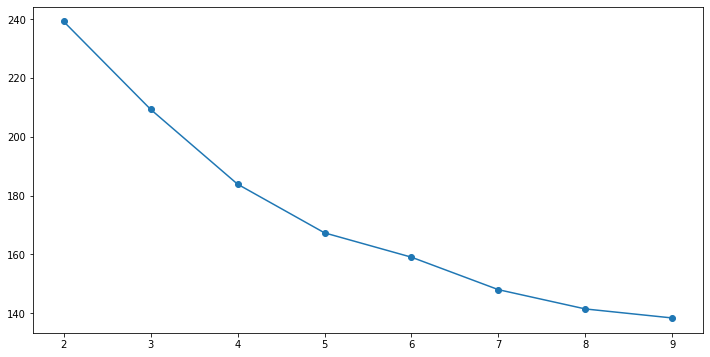

In [ ]:
#Elbow plot
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors,marker = 'o');

In [ ]:
cluster = KMeans( n_clusters = 6, random_state = 1)
cluster.fit(wine_data_z)
KMeans(n_clusters = 6, random_state=1)

KMeans(n_clusters=6, random_state=1)

Every cluster gets associated with a label, centroid and intertia..

In [ ]:
centroids = cluster.cluster_centers_
centroids

array([[0.33213154, 0.16053611, 0.41074074, 0.10288066, 0.10373256,
        0.17408567, 0.0915238 , 0.38537191, 0.43264962, 0.22991055,
        0.49566318],
       [0.16252212, 0.33726027, 0.07785   , 0.09167808, 0.09617696,
        0.25070423, 0.12392226, 0.31143172, 0.59346457, 0.18002994,
        0.50421795],
       [0.26540448, 0.35148572, 0.12267658, 0.09141544, 0.12275726,
        0.14952354, 0.1103879 , 0.49077046, 0.48264204, 0.15929479,
        0.22131351],
       [0.57148199, 0.20168098, 0.51073944, 0.13011287, 0.12931764,
        0.13405078, 0.08903598, 0.6404883 , 0.3387213 , 0.23011723,
        0.31119538],
       [0.33249052, 0.28522505, 0.49785714, 0.07265166, 0.55008347,
        0.21780684, 0.21794548, 0.51305853, 0.23003375, 0.60179641,
        0.15549451],
       [0.32266181, 0.28046378, 0.30366013, 0.15679559, 0.12692723,
        0.3854368 , 0.29688907, 0.54776952, 0.43443467, 0.1778404 ,
        0.2109938 ]])

In [ ]:
centroid_df = pd.DataFrame(centroids, columns = list(wine_data_z))

In [ ]:
prediction = cluster.predict(wine_data_z)
#Is to predict in which cluster each wine will go
#Once the cluster numbers are predicted, I want to insert a new column in my data set
# Calle Groupp and here I will put the cluster number
wine_data_x["Group"] = pd.DataFrame(prediction, columns= ["Group"])
#Print the first 20 elements in the dataframe to verify if the cluster numbers appear under column Group
print(wine_data_x.head(5))
# Count the number of wines in each Cluster
print(wine_data_x.groupby("Group").count())
#Based on the wine quality group the wines and see how many wines are in each Quality
print(wine_data.groupby("quality").count())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Group  
0      9.4      2  
1      9.8      2  
2      9.8      2  
3     